## Creating labelled dataset for ANFO

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns

In [2]:
# Reading into the train dataset

train = pd.read_csv("Train_ANFO.csv")
print(train.head())

   Stemming, m  Charge Per Hole  Average Spacing, m  Average Burden, m
0         3.65         9.556761                5.15               4.25
1         3.55         9.428631                5.50               4.40
2         3.60         9.494186                5.30               4.15
3         3.40         9.640602                5.20               4.30
4         3.30         9.837349                5.30               4.20


In [3]:
print(train.describe())

       Stemming, m  Charge Per Hole  Average Spacing, m  Average Burden, m
count   153.000000       153.000000          153.000000         153.000000
mean      3.250654         7.742943            4.921895           3.646732
std       0.274460         1.977737            0.826868           0.487227
min       2.800000         5.064857            3.900000           3.000000
25%       3.000000         5.874444            4.200000           3.200000
50%       3.200000         6.255341            4.400000           3.500000
75%       3.400000         9.798000            5.500000           4.000000
max       4.000000        10.705222            6.800000           4.650000


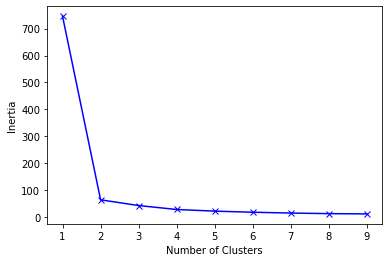

In [4]:
# Applying Elbow Method

inertia = []
for k in range(1, 10):
    kmeanModel = KMeans(n_clusters = k).fit(train)
    kmeanModel.fit(train)
    inertia.append(kmeanModel.inertia_)

plt.plot(range(1, 10), inertia, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### Thus we take the number of clusters (n_clusters) = 2

In [5]:
# Applying KMeans 

kmeans = KMeans(n_clusters = 2).fit(train)

In [6]:
# Adding the labels column to training dataset

labels = pd.DataFrame(kmeans.labels_)
labeled_train = pd.concat((train,labels),axis=1)
labeled_train = labeled_train.rename({0:'clusters'},axis=1)

In [7]:
print(labeled_train.head(10))

   Stemming, m  Charge Per Hole  Average Spacing, m  Average Burden, m  \
0         3.65         9.556761                5.15               4.25   
1         3.55         9.428631                5.50               4.40   
2         3.60         9.494186                5.30               4.15   
3         3.40         9.640602                5.20               4.30   
4         3.30         9.837349                5.30               4.20   
5         3.35         9.817440                5.25               4.15   
6         4.00         6.998571                5.00               4.00   
7         3.80         7.465143                5.20               4.00   
8         3.75         9.125588                5.75               4.00   
9         3.90         7.231857                5.00               4.00   

   clusters  
0         0  
1         0  
2         0  
3         0  
4         0  
5         0  
6         1  
7         1  
8         0  
9         1  


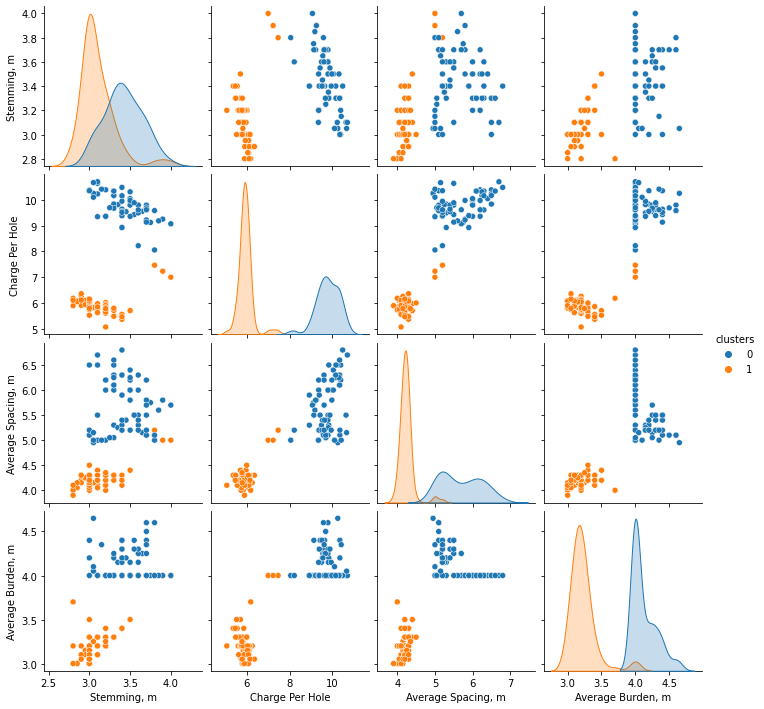

In [8]:
sns.pairplot(labeled_train,hue='clusters')
plt.show()

In [9]:
# Reading into the test dataset

test = pd.read_csv("Test_ANFO.csv")
print(test.describe())

       Stemming, m  Charge Per Hole  Average Spacing, m  Average Burden, m
count    17.000000        17.000000           17.000000          17.000000
mean      3.270588         7.502510            4.635294           3.723529
std       0.215826         2.096514            0.507064           0.594537
min       3.000000         4.905556            4.000000           3.000000
25%       3.100000         5.559259            4.200000           3.100000
50%       3.200000         8.889412            4.900000           4.000000
75%       3.400000         9.342353            5.100000           4.200000
max       3.600000        10.023333            5.250000           4.500000


In [10]:
print(kmeans.predict(test))

[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


    Stemming, m  Charge Per Hole  Average Spacing, m  Average Burden, m  \
0          3.10         9.861628                5.25               4.25   
1          3.15        10.023333                5.00               4.10   
2          3.60         8.889412                5.10               4.20   
3          3.40         9.178571                5.20               4.00   
4          3.35         9.342353                5.10               4.15   
5          3.30         9.637500                5.00               4.00   
6          3.60         9.111364                5.00               4.50   
7          3.55         8.980000                5.25               4.50   
8          3.55         9.501622                4.90               4.50   
9          3.00         5.886667                4.20               3.00   
10         3.10         5.609412                4.00               3.10   
11         3.20         5.062667                4.10               3.20   
12         3.00         5

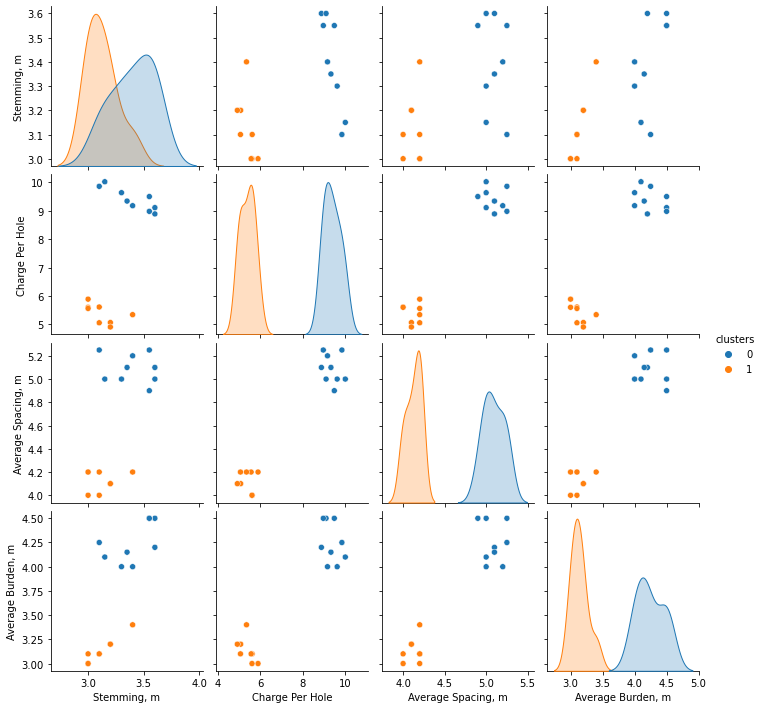

In [11]:
# Adding the labels column to test dataset

labels_test = pd.DataFrame(kmeans.predict(test))
labeled_test = pd.concat((test,labels_test),axis=1)
labeled_test = labeled_test.rename({0:'clusters'},axis=1)
print(labeled_test)
sns.pairplot(labeled_test,hue="clusters")
plt.show()

### Exporting the labelled datasets for furthur processing

In [12]:
labeled_train.to_csv("Train_ANFO_labelled.csv")

In [13]:
labeled_test.to_csv("Test_ANFO_labelled.csv")